# 밈 생성기 모델

In [68]:
# !pip install transformers torch

In [69]:
# !pip install transformers torch pillow

-------


In [70]:
from PIL import Image, ImageDraw, ImageFont
import random
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
from transformers import pipeline
import os

In [71]:
# 1. 모델과 토크나이저 로드
model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
tokenizer = PreTrainedTokenizerFast.from_pretrained('skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='<unk>')


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [72]:
# 2. 밈 텍스트 생성 함수 정의
def generate_meme_text(keyword, max_length=50):
    prompt = f"{keyword} 하면 떠오르는 것은? "
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, top_p=0.95, top_k=50, do_sample=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    # 키워드 + 생성된 문장 합치기
    result_text = f"{keyword}: {generated_text.replace(prompt, '').strip()}"
    return result_text

In [73]:
# # 이미지에 텍스트 추가 함수
# def create_meme_image(image_path, text, output_path):
#     image = Image.open(image_path)
#     draw = ImageDraw.Draw(image)

#     # 글꼴 설정 (코랩 환경에서 기본 폰트 사용)
#     try:
#         font_size = int(image.height * 0.1)  # 이미지 높이의 20% 크기로 글자 크기 조정
#         font = ImageFont.truetype("/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf", size=font_size)
#     except IOError:
#         font = ImageFont.load_default()

#     # 텍스트 크기 계산
#     text_bbox = draw.textbbox((0, 0), text, font=font)
#     text_width = text_bbox[2] - text_bbox[0]
#     text_height = text_bbox[3] - text_bbox[1]

#     # 텍스트 위치를 상단 중앙으로 조정
#     text_position = ((image.width - text_width) // 2, 10)

#     draw.text(text_position, text, font=font, fill="white")

#     image.save(output_path)

In [74]:
def create_meme_image(image_path, text, output_path):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # 글꼴 설정 (코랩 환경에서 기본 폰트 사용)
    try:
        font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"
        # 시작 폰트 크기를 이미지 높이의 15%로 설정 (기존 20%에서 변경)
        font_size = int(image.height * 0.15)
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        font = ImageFont.load_default()

    # 텍스트가 이미지 너비의 80%를 초과하지 않도록 폰트 크기 조정
    max_width = int(image.width * 0.8)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # 텍스트가 너무 크면 폰트 크기 줄이기
    while text_width > max_width and font_size > 10:
        font_size -= 1
        try:
            font = ImageFont.truetype(font_path, size=font_size)
        except IOError:
            font = ImageFont.load_default()
        text_bbox = draw.textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

    # 여백 설정 (상단에서 5% 떨어진 위치)
    margin = int(image.height * 0.05)
    text_position = ((image.width - text_width) // 2, margin)

    # 텍스트에 외곽선 추가해 가독성 높이기
    outline_color = "black"
    for offset_x, offset_y in [(1,1), (1,-1), (-1,1), (-1,-1)]:
        draw.text((text_position[0]+offset_x, text_position[1]+offset_y),
                 text, font=font, fill=outline_color)

    # 실제 텍스트 그리기
    draw.text(text_position, text, font=font, fill="white")

    image.save(output_path)

In [75]:
# 밈 생성 함수
def generate_meme(keyword):
    # 업로드한 이미지 목록에서 선택
    image_folder = "content/"
    sample_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]

    if not sample_images:
        raise FileNotFoundError("❌ 이미지가 없습니다. 'content/'에 이미지 파일을 업로드하세요.")

    image_path = random.choice(sample_images)

    # 밈 텍스트 생성
    meme_text = generate_meme_text(keyword)

    # 결과 이미지 저장 경로
    output_path = f"content/output_meme_{keyword}.jpg"

    # 이미지에 텍스트 추가
    create_meme_image(image_path, meme_text, output_path)

    print(f"✅ 밈 생성 완료: {output_path}")
    return output_path


In [76]:
print(os.listdir('content/'))

['meme7.jpg', 'meme2.jpg', 'meme5.jpg', 'meme4.jpg', 'meme9.jpg', 'meme3.jpg', 'meme8.jpg', 'meme6.jpg', '.ipynb_checkpoints', 'output_meme_고양이.jpg']


In [77]:
# !ls /usr/share/fonts/truetype/

In [78]:
# !apt-get update
# !apt-get install -y fonts-nanum

In [79]:
# !ls /usr/share/fonts/truetype/nanum

### 테스트

키워드를 입력하세요: 유지은
✅ 밈 생성 완료: content/output_meme_유지은.jpg


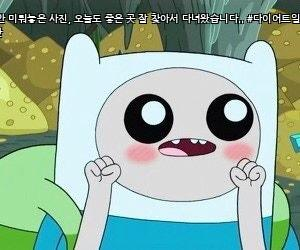

In [80]:
# 테스트 실행
if __name__ == "__main__":
    user_input = input("키워드를 입력하세요: ")
    output_image_path = generate_meme(user_input)

    # 생성된 밈 이미지 출력
    from IPython.display import Image, display
    display(Image(output_image_path))